# ECE176 Final Project

In [16]:
# Import Packages
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import json
import seaborn as sns
from mido import MidiFile, tick2second
from data_processing.tokenize_midi import tokenize_basic_vocab
from data_processing.decoding import decode_to_tokens_basic_vocab

## Dataset

In [17]:
import torch
print(torch.__version__)          # Should show a version with CUDA (not CPU)
print(torch.cuda.is_available())  # Should return True
print(torch.version.cuda)         # Should match your CUDA version

if torch.cuda.is_available():
    device = torch.device("cuda")
    gpu_name = torch.cuda.get_device_name(device)
    gpu_capability = torch.cuda.get_device_capability(device)
    total_memory = torch.cuda.get_device_properties(device).total_memory / 1e9  # Convert to GB

    print(f"GPU Name: {gpu_name}")
    print(f"Compute Capability: {gpu_capability}")
    print(f"Total Memory: {total_memory:.2f} GB")
else:
    print("CUDA device not available.")

2.6.0+cu118
True
11.8
GPU Name: NVIDIA GeForce RTX 3080 Laptop GPU
Compute Capability: (8, 6)
Total Memory: 17.18 GB


In [ ]:
from data_processing.tokenize_midi import tokenize_basic_vocab
from data_processing.decoding import decode_to_tokens_basic_vocab
import importlib
import data_processing.tokenize_midi
from data_processing.decoding import decode_to_midi_basic_vocab
import data_processing.decoding

importlib.reload(data_processing.tokenize_midi)
importlib.reload(data_processing.decoding)


from data_processing.tokenize_midi import tokenize_basic_vocab


file1 = "datasets/raw_midi/lmd_full_direct/c0a7b59ac24b8e0dbc4df9a61cee7e11.mid"
file2 = "datasets/raw_midi/lmd_full_direct/c0ae1d2daacff3fe4549aac56f12485f.mid"

mid = MidiFile(file1)
id_sequence = tokenize_basic_vocab(mid)
token_sequence = decode_to_tokens_basic_vocab(id_sequence)
print(token_sequence)

from collections import Counter

# Count token occurrences
token_counts = Counter(token_sequence)

# Convert to token names
sorted_tokens = sorted(token_counts.items(), key=lambda x: x[1], reverse=True)

# Display top 20 tokens
print("Top 20 Most Frequent Tokens:")
for token, count in sorted_tokens[:20]:
    print(f"{token}: {count}")

# Bar plot of most common tokens
plt.figure(figsize=(12, 5))
sns.barplot(x=[t[0] for t in sorted_tokens[:20]], y=[t[1] for t in sorted_tokens[:20]])
plt.xticks(rotation=90)
plt.xlabel("Token")
plt.ylabel("Count")
plt.title("Top 20 Most Frequent Tokens in Dataset")
plt.show()

timeshifts = 0
velocities = 0
notes = 0
for token in token_counts:
    if "TIME" in token:
        timeshifts += token_counts[token]
    if "VELOCITY" in token:
        velocities += token_counts[token]
    if "NOTE" in token:
        notes += token_counts[token]

print(f"timeshifts: {timeshifts}")
print(f"velocities: {velocities}")
print(f"notes: {notes}")

#decode_to_midi_basic_vocab(token_sequence, "./decoded.mid")

from collections import defaultdict

def count_consecutive_time_shift_10ms(token_sequence):
    """
    Count consecutive streaks of TIME_SHIFT_10ms in the token sequence.
    """
    streaks = defaultdict(int)
    current_streak = 0

    for token in token_sequence:
        if token == "TIME_SHIFT_1000ms":
            current_streak += 1
        else:
            if current_streak > 0:
                streaks[current_streak] += 1
                current_streak = 0

    # Append last streak if it ended at the end of the sequence
    if current_streak > 0:
        streaks[current_streak] += 1

    return streaks


streaks = count_consecutive_time_shift_10ms(token_sequence)
print(streaks)

print(token_sequence)
print(len(token_sequence))

In [18]:
# Paths
TRAIN_DATA_PATH = "datasets/tokenized/test"
VOCAB_PATH = "models/vocab/basic_vocab.json"

# Load vocabulary
with open(VOCAB_PATH, "r") as f:
    vocab = json.load(f)

# Reverse vocab (ID -> Token)
id_to_token = {v: k for k, v in vocab.items()}

# Load tokenized sequences
def load_all_sequences(data_path):
    """Loads all tokenized sequences from the specified dataset path."""
    sequences = []
    files = sorted(os.listdir(data_path))  # Limit for performance
    for file in files:
        if file.endswith(".pkl"):
            with open(os.path.join(data_path, file), "rb") as f:
                seq = pickle.load(f)
                if len(seq) == 0:
                    print(file)
                sequences.append(seq)
    return sequences

train_sequences = load_all_sequences(TRAIN_DATA_PATH)
print(f"Loaded {len(train_sequences)} tokenized sequences from {TRAIN_DATA_PATH}")

Loaded 4990 tokenized sequences from datasets/tokenized/test


In [19]:
def ids_to_tokens(vocab, id_sequence):
    # Reverse the vocab (ID -> Token)
    id_to_token = {v: k for k, v in vocab.items()}

    # Convert token IDs back to tokens
    token_sequence = [id_to_token.get(token_id, "<UNK>") for token_id in id_sequence]

    return token_sequence

id_sequence = train_sequences[1]  # Example sequence of token IDs
tokens = ids_to_tokens(vocab, id_sequence)

print(len(tokens))
print("Decoded Tokens:", tokens)


11425
Decoded Tokens: ['NOTE_ON_72', 'VELOCITY_26', 'NOTE_ON_75', 'VELOCITY_26', 'NOTE_ON_32', 'VELOCITY_25', 'NOTE_ON_60', 'VELOCITY_26', 'NOTE_ON_63', 'VELOCITY_29', 'NOTE_ON_35', 'VELOCITY_29', 'NOTE_ON_49', 'VELOCITY_13', 'NOTE_ON_40', 'VELOCITY_18', 'NOTE_OFF_40', 'NOTE_OFF_49', 'NOTE_OFF_35', 'TIME_SHIFT_10ms', 'NOTE_ON_63', 'VELOCITY_26', 'TIME_SHIFT_40ms', 'NOTE_ON_84', 'VELOCITY_26', 'TIME_SHIFT_10ms', 'NOTE_OFF_72', 'NOTE_OFF_75', 'TIME_SHIFT_10ms', 'NOTE_ON_72', 'VELOCITY_21', 'NOTE_ON_75', 'VELOCITY_21', 'TIME_SHIFT_40ms', 'NOTE_OFF_84', 'TIME_SHIFT_10ms', 'NOTE_ON_84', 'VELOCITY_21', 'TIME_SHIFT_10ms', 'NOTE_OFF_72', 'NOTE_OFF_75', 'TIME_SHIFT_10ms', 'NOTE_ON_72', 'VELOCITY_27', 'NOTE_ON_75', 'VELOCITY_27', 'TIME_SHIFT_40ms', 'NOTE_OFF_84', 'TIME_SHIFT_10ms', 'NOTE_ON_84', 'VELOCITY_27', 'TIME_SHIFT_10ms', 'NOTE_OFF_72', 'NOTE_OFF_75', 'TIME_SHIFT_10ms', 'NOTE_ON_72', 'VELOCITY_22', 'NOTE_ON_75', 'VELOCITY_22', 'TIME_SHIFT_40ms', 'NOTE_OFF_84', 'TIME_SHIFT_10ms', 'NOTE_ON_

Min Length: 11
Max Length: 129076
Mean Length: 17213.57
Median Length: 16311.5
Number of zero lenght sequences: 0


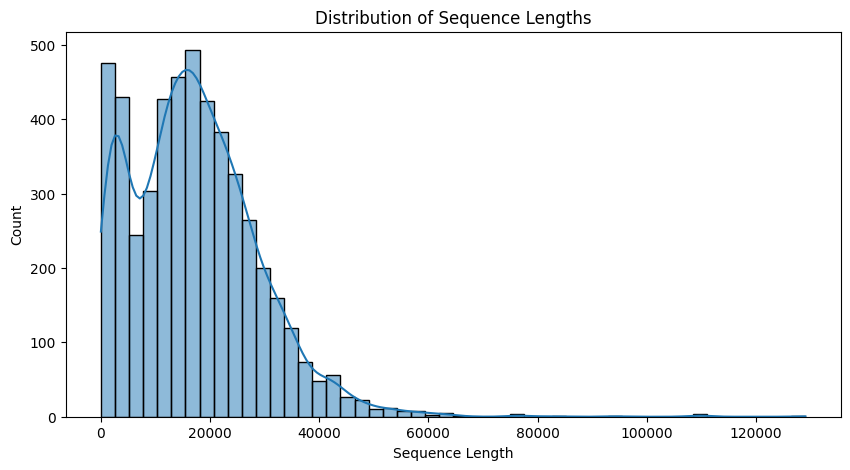

In [20]:
seq_lengths = []
num_zero_len = 0
for seq in train_sequences:
    seq_lengths.append(len(seq))
    if len(seq) == 0:
        num_zero_len += 1

# Statistics
print(f"Min Length: {np.min(seq_lengths)}")
print(f"Max Length: {np.max(seq_lengths)}")
print(f"Mean Length: {np.mean(seq_lengths):.2f}")
print(f"Median Length: {np.median(seq_lengths)}")
print(f"Number of zero lenght sequences: {num_zero_len}")

# Histogram of sequence lengths
plt.figure(figsize=(10, 5))
sns.histplot(seq_lengths, bins=50, kde=True)
plt.xlabel("Sequence Length")
plt.ylabel("Count")
plt.title("Distribution of Sequence Lengths")
plt.show()


Top 20 Most Frequent Tokens:
TIME_SHIFT_10ms: 4453169
VELOCITY_25: 2126285
TIME_SHIFT_20ms: 2064452
NOTE_OFF_42: 1940530
NOTE_ON_42: 1938357
VELOCITY_32: 1606038
TIME_SHIFT_30ms: 1561600
VELOCITY_20: 1478663
VELOCITY_23: 1447902
VELOCITY_24: 1357219
VELOCITY_21: 1270883
VELOCITY_22: 1213686
VELOCITY_26: 1129119
VELOCITY_18: 1105597
VELOCITY_19: 1091990
VELOCITY_28: 1085324
TIME_SHIFT_40ms: 1035115
VELOCITY_16: 1033328
TIME_SHIFT_50ms: 973911
VELOCITY_27: 958247


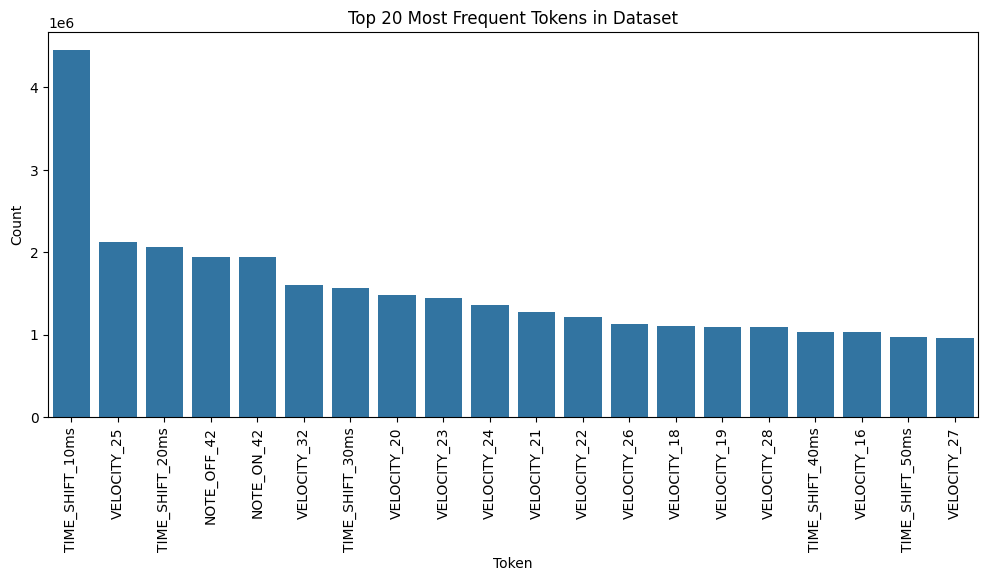

TIME_SHIFT_10ms count: 4453169
TIME_SHIFT_10ms streaks: defaultdict(<class 'int'>, {1: 4453169})
TIME_SHIFT_20ms count: 2064452
TIME_SHIFT_20ms streaks: defaultdict(<class 'int'>, {1: 2064452})
TIME_SHIFT_30ms count: 1561600
TIME_SHIFT_30ms streaks: defaultdict(<class 'int'>, {1: 1561600})
TIME_SHIFT_40ms count: 1035115
TIME_SHIFT_40ms streaks: defaultdict(<class 'int'>, {1: 1035115})
TIME_SHIFT_100ms count: 428588
TIME_SHIFT_100ms streaks: defaultdict(<class 'int'>, {1: 428588})
TIME_SHIFT_1000ms count: 22740
TIME_SHIFT_1000ms streaks: defaultdict(<class 'int'>, {4: 320, 1: 8186, 2: 1681, 3: 620, 8: 22, 5: 132, 14: 3, 6: 58, 7: 39, 132: 1, 550: 1, 13: 5, 1777: 1, 11: 6, 12: 4, 51: 4, 28: 1, 79: 4, 9: 10, 25: 1, 15: 4, 72: 1, 137: 1, 10: 7, 297: 1, 214: 1, 52: 1, 63: 1, 279: 1, 18: 3, 49: 1, 59: 1, 134: 1, 19: 1, 43: 1, 136: 1, 121: 1, 110: 1, 24: 1, 58: 1, 38: 1, 114: 1, 241: 1, 50: 1, 71: 1, 16: 3, 96: 1, 66: 1, 123: 1, 65: 1, 46: 1, 48: 1, 34: 1, 47: 1, 32: 1, 33: 1, 22: 1, 27: 1})


In [24]:
from collections import Counter

# Flatten sequences into a single list of token IDs
all_tokens = [token for seq in train_sequences for token in seq]
all_token_tokens = [id_to_token[token] for token in all_tokens]
# Count token occurrences
token_counts = Counter(all_tokens)

# Convert to token names
token_names = {id_to_token[k]: v for k, v in token_counts.items()}
sorted_tokens = sorted(token_names.items(), key=lambda x: x[1], reverse=True)

# Display top 20 tokens
print("Top 20 Most Frequent Tokens:")
for token, count in sorted_tokens[:20]:
    print(f"{token}: {count}")

# Bar plot of most common tokens
plt.figure(figsize=(12, 5))
sns.barplot(x=[t[0] for t in sorted_tokens[:20]], y=[t[1] for t in sorted_tokens[:20]])
plt.xticks(rotation=90)
plt.xlabel("Token")
plt.ylabel("Count")
plt.title("Top 20 Most Frequent Tokens in Dataset")
plt.show()

from collections import defaultdict

def count_consecutive_time_shift_10ms(token_sequence, timeshift):
    """
    Count consecutive streaks of TIME_SHIFT_10ms in the token sequence.
    """
    streaks = defaultdict(int)
    num_10s = 0
    current_streak = 0

    for token in token_sequence:
        if token == timeshift:
            current_streak += 1
            num_10s += 1
        else:
            if current_streak > 0:
                streaks[current_streak] += 1
                current_streak = 0

    # Append last streak if it ended at the end of the sequence
    if current_streak > 0:
        streaks[current_streak] += 1

    return num_10s, streaks


for timeshift in ["TIME_SHIFT_10ms", "TIME_SHIFT_20ms", "TIME_SHIFT_30ms", "TIME_SHIFT_40ms", "TIME_SHIFT_100ms", "TIME_SHIFT_1000ms"]:
    num_10s, streaks = count_consecutive_time_shift_10ms(all_token_tokens, timeshift)
    print(f"{timeshift} count: {num_10s}")
    print(f"{timeshift} streaks: {streaks}")
    
times = 0
velocities = 0
notes= 0
for token in all_token_tokens:
    if "TIME_SHIFT_10ms" in token:
        times += 1
    elif "VELOCITY" in token:
        velocities += 1
    elif "NOTE" in token:
        notes += 1

print(f"Time shifts: {times}")
print(f"Velocities: {velocities}")
print(f"Notes: {notes}")

In [ ]:
# Extract all TIME_SHIFT tokens
time_shift_tokens = [id_to_token[token] for token in all_tokens if "TIME_SHIFT" in id_to_token[token]]

# Count occurrences of each TIME_SHIFT value
time_shift_counts = Counter(time_shift_tokens)
sorted_shifts = sorted(time_shift_counts.items(), key=lambda x: x[1], reverse=True)

# Display top 15 time shifts
print("Top 15 Most Frequent TIME_SHIFT Tokens:")
for shift, count in sorted_shifts[:15]:
    print(f"{shift}: {count}")

# Plot distribution of TIME_SHIFT tokens
plt.figure(figsize=(12, 5))
sns.barplot(x=[t[0] for t in sorted_shifts[:15]], y=[t[1] for t in sorted_shifts[:15]])
plt.xticks(rotation=90)
plt.xlabel("Time Shift Token")
plt.ylabel("Count")
plt.title("Most Frequent TIME_SHIFT Tokens")
plt.show()


In [ ]:
# Extract all VELOCITY tokens
velocity_tokens = [id_to_token[token] for token in all_tokens if "NOTE_OFF" in id_to_token[token]]

# Count occurrences
velocity_counts = Counter(velocity_tokens)
sorted_velocities = sorted(velocity_counts.items(), key=lambda x: x[1], reverse=True)

# Display top 10 velocities
print("Top 10 Most Frequent VELOCITY Tokens:")
for vel, count in sorted_velocities[:10]:
    print(f"{vel}: {count}")

# Plot velocity distribution
plt.figure(figsize=(12, 5))
sns.barplot(x=[t[0] for t in sorted_velocities[:10]], y=[t[1] for t in sorted_velocities[:10]])
plt.xticks(rotation=90)
plt.xlabel("Velocity Token")
plt.ylabel("Count")
plt.title("Most Frequent VELOCITY Tokens")
plt.show()


In [ ]:
def count_initial_time_shifts(sequences, id_to_token):
    time_shift_counts = []
    for seq in sequences:
        count = 0
        for token_id in seq:
            token = id_to_token.get(token_id, "")
            if token.startswith("TIME_SHIFT_"):
                count += 1
            else:
                break  # Stop counting once a non-time-shift token is encountered
        time_shift_counts.append(count)
    return time_shift_counts

def count_ending_time_shifts(sequences, id_to_token):
    time_shift_counts = []
    for seq in sequences:
        count = 0
        for token_id in reversed(seq):  # Iterate from the end
            token = id_to_token.get(token_id, "")
            if token.startswith("TIME_SHIFT_"):
                count += 1
            else:
                break  # Stop counting once a non-time-shift token is encountered
        time_shift_counts.append(count)
    return time_shift_counts

initial_time_shifts = count_initial_time_shifts(train_sequences, id_to_token)
print(f"🔹 Average initial TIME_SHIFT tokens: {np.mean(initial_time_shifts):.2f}")

ending_time_shifts = count_ending_time_shifts(train_sequences, id_to_token)
print(f"🔹 Average ending TIME_SHIFT tokens: {np.mean(ending_time_shifts):.2f}")


plt.figure(figsize=(10, 5))
sns.histplot(initial_time_shifts, bins=300, kde=True)
plt.xlabel("Number of Initial TIME_SHIFT Tokens")
plt.ylabel("Count")
plt.title("Distribution of Initial TIME_SHIFT Tokens in Training Sequences")
plt.show()


In [ ]:
import numpy as np

# Function to compute the proportion of initial TIME_SHIFT tokens per sequence
def compute_time_shift_proportions(sequences, id_to_token):
    proportions = []
    
    for seq in sequences:
        total_length = len(seq)
        time_shift_count = 0

        # Count initial TIME_SHIFT tokens
        for token_id in seq:
            token = id_to_token.get(token_id, "")
            if token.startswith("TIME_SHIFT_"):
                time_shift_count += 1
            else:
                break  # Stop once a non-TIME_SHIFT token is encountered

        # Compute proportion of silence in the song
        proportion = time_shift_count / total_length if total_length > 0 else 0
        proportions.append(proportion)

    return proportions

# Compute proportions for training data
time_shift_proportions = compute_time_shift_proportions(train_sequences, id_to_token)

# Display basic statistics
print(f"🔹 Average Silence Proportion: {np.mean(time_shift_proportions):.2%}")
print(f"🔹 Median Silence Proportion: {np.median(time_shift_proportions):.2%}")
print(f"🔹 Max Silence Proportion: {np.max(time_shift_proportions):.2%}")
print(f"🔹 Min Silence Proportion: {np.min(time_shift_proportions):.2%}")

In [ ]:
silent_endings = sum(1 for count in ending_time_shifts if count > 30)  # Threshold for excessive silence
total_sequences = len(ending_time_shifts)

print(f"🔹 Sequences with >50 Ending TIME_SHIFT Tokens: {silent_endings}/{total_sequences} ({silent_endings / total_sequences * 100:.2f}%)")


In [ ]:
import os
import json
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from models.MusicTransformer import MusicTransformer
from models.dataset import MidiDataset, collate_batch
from tqdm import tqdm
import matplotlib.patches as mpatches


train_dataset = MidiDataset(
    data_dir=TRAIN_DATA_PATH,
    max_seq_length=1024,
    pad_token_id=vocab["TOKEN_PAD"]
)

train_loader = DataLoader(
    train_dataset,
    batch_size=4,
    shuffle=True,
    collate_fn=collate_batch
)

def count_consecutive_time_shift_10ms(token_sequence):
    """
    Count consecutive streaks of TIME_SHIFT_10ms in the token sequence.
    """
    streaks = defaultdict(int)
    current_streak = 0

    for token in token_sequence:
        if token == "TIME_SHIFT_10ms":
            current_streak += 1
        else:
            if current_streak > 0:
                streaks[current_streak] += 1
                current_streak = 0

    # Append last streak if it ended at the end of the sequence
    if current_streak > 0:
        streaks[current_streak] += 1

    return streaks

streak_sum_counts = defaultdict(int)
streak_total_occurrences = defaultdict(int)

num_batches = 5000  # number of batches you process

for batch_idx, (x, y) in enumerate(train_loader):
    if batch_idx >= num_batches:
        break
    
    x = [ids_to_tokens(vocab, sample.tolist()) for sample in x]

    for token_sequence in x:
        streak_dict = dict(count_consecutive_time_shift_10ms(token_sequence))
        
        # Aggregate sums and counts for averaging later
        for streak_len, count in streak_dict.items():
            streak_sum_counts[streak_len] += count
            streak_total_occurrences[streak_len] += 1

# Now compute the average counts for each streak length across batches
avg_streak_counts = {
    streak_len: streak_sum_counts[streak_len] / streak_total_occurrences[streak_len]
    for streak_len in sorted(streak_sum_counts)
}

print("Average streak counts of TIME_SHIFT_10ms across batches:")
for streak_len, avg_count in avg_streak_counts.items():
    print(f"Streak length {streak_len}: Average count {avg_count:.2f}")


In [5]:
import os
try:
    os.remove('datasets/raw_midi/lmd_full_direct/0039c4ad089aa3e94b85e9ad3f1ae981.mid')
    print("success")
except Exception as del_err:
    print(f"Error deleting: {del_err}")

Error deleting: [WinError 2] The system cannot find the file specified: 'datasets/raw_midi/lmd_full_direct/0039c4ad089aa3e94b85e9ad3f1ae981.mid'
